In [162]:
# 1. Predicting House Prices 
# Objective: Predict house prices based on features like size, location, and number of rooms. 
# • Dataset: Boston Housing Dataset or any similar dataset. 
# • Algorithm: Linear Regression. 
# • Evaluation: Mean Squared Error (MSE), R² score

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import statsmodels.api as sm

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

In [164]:
boston_df = pd.read_csv("BostonHousing.csv")
main_df = pd.read_csv("BostonHousing.csv")
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [165]:
boston_df.rename(columns={"medv":"Price"}, inplace=True)
boston_df.sample(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
229,0.44178,0.0,6.20,0,0.504,6.552,21.4,3.3751,8,307,17.4,380.34,3.76,31.5
416,10.83420,0.0,18.10,0,0.679,6.782,90.8,1.8195,24,666,20.2,21.57,25.79,7.5
148,2.33099,0.0,19.58,0,0.871,5.186,93.8,1.5296,5,403,14.7,356.99,28.32,17.8
21,0.85204,0.0,8.14,0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6
221,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307,17.4,395.24,21.46,21.7
174,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296,16.6,393.23,9.64,22.6
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
439,9.39063,0.0,18.10,0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88,12.8
429,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666,20.2,60.72,24.08,9.5
422,12.04820,0.0,18.10,0,0.614,5.648,87.6,1.9512,24,666,20.2,291.55,14.10,20.8


In [166]:
boston_df.shape

(506, 14)

In [167]:
boston_df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
Price      0
dtype: int64

In [168]:
boston_df.duplicated().sum()

0

In [169]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [170]:
#Univariate Analysis

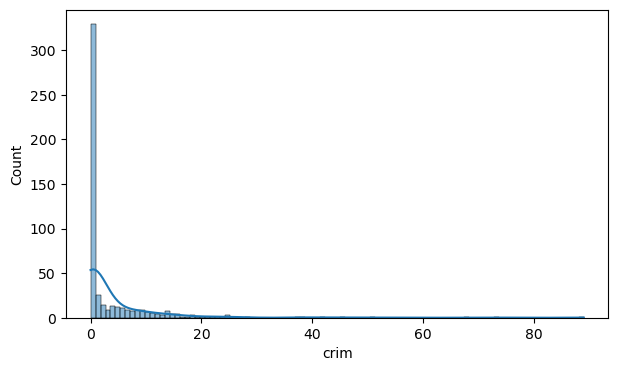

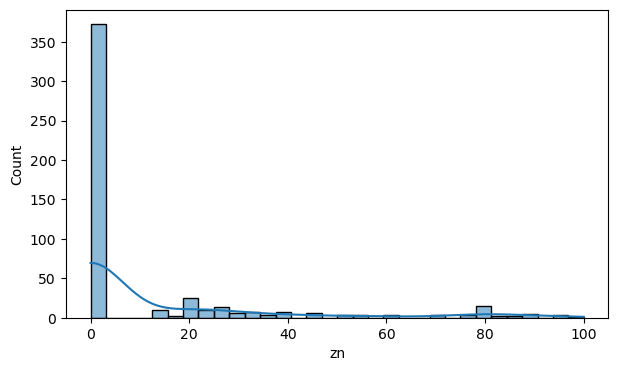

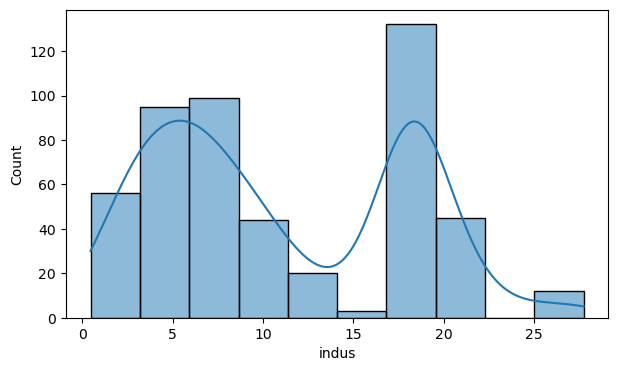

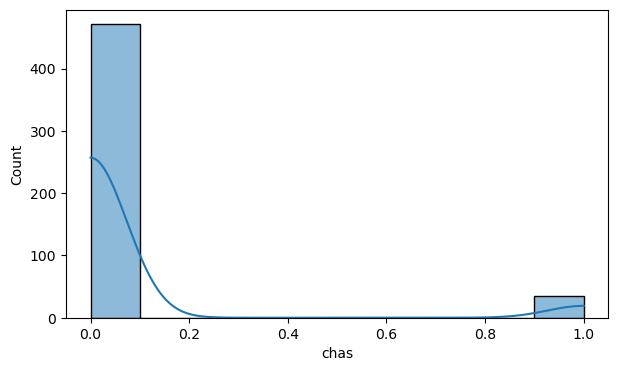

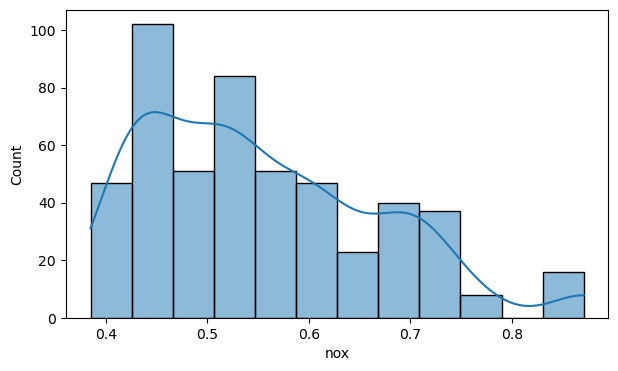

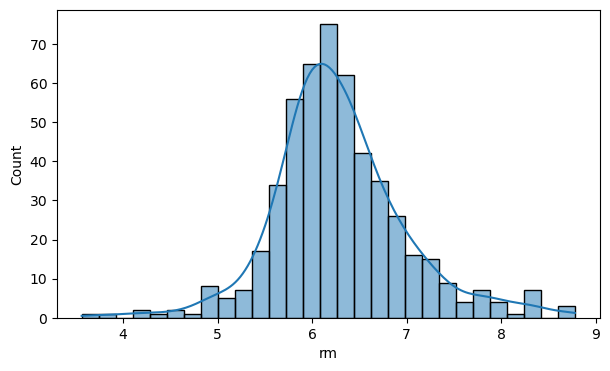

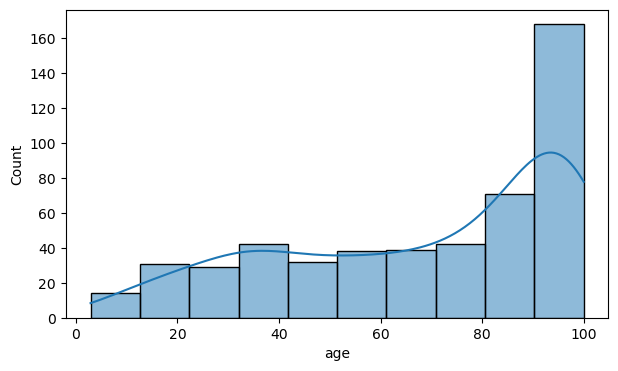

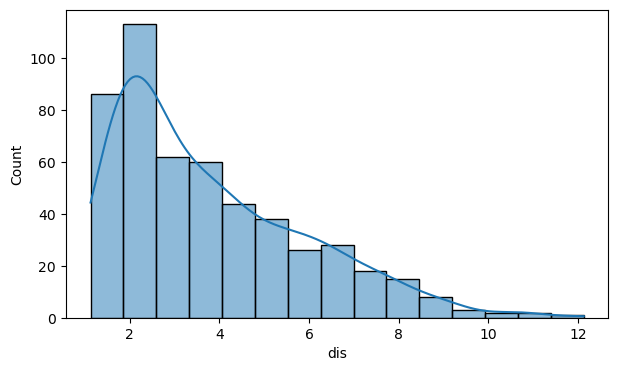

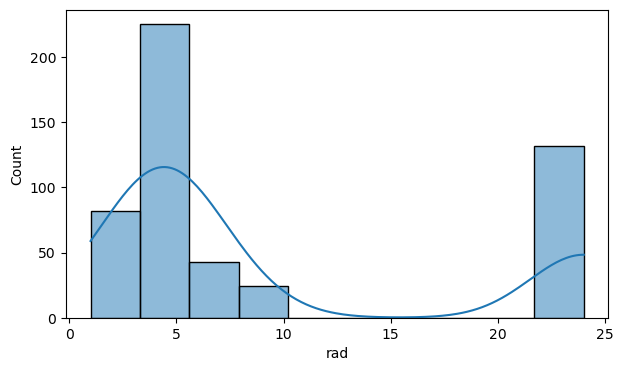

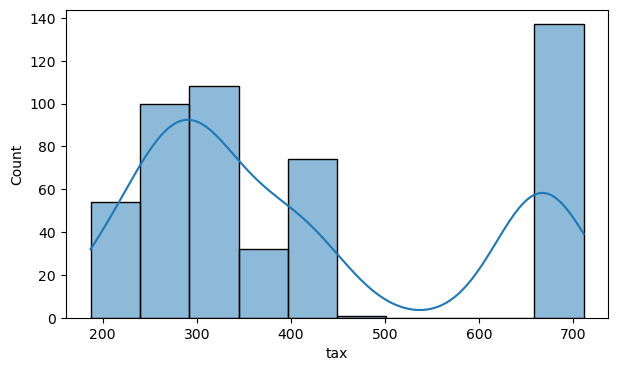

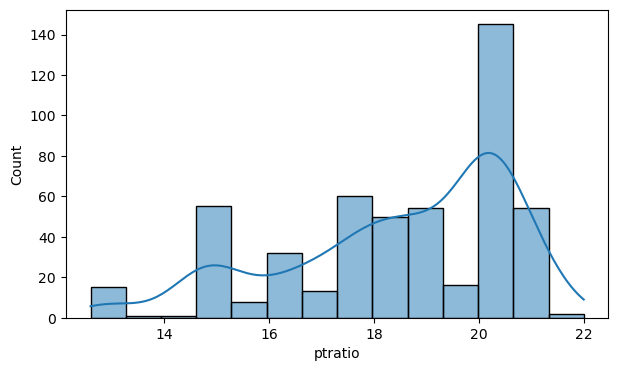

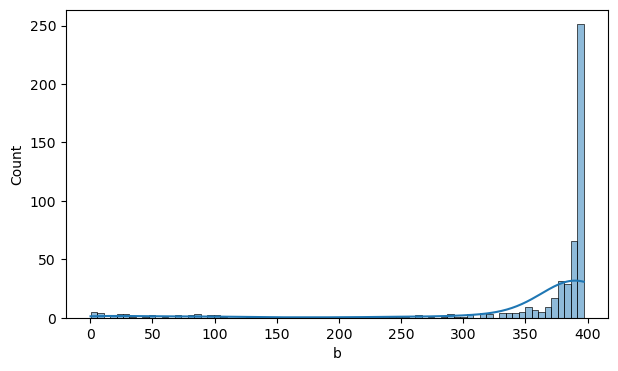

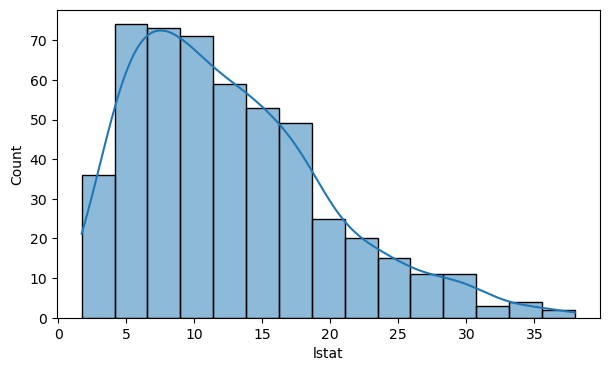

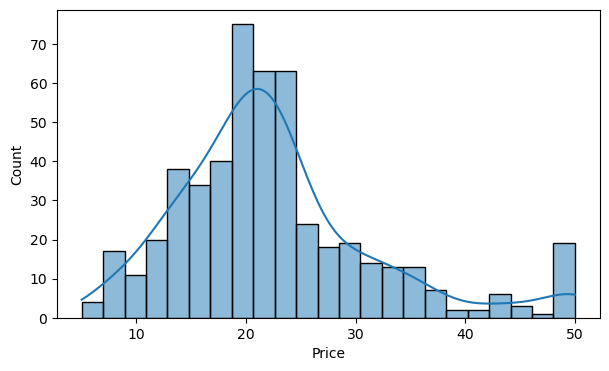

In [171]:
for i in boston_df.columns:
    plt.figure(figsize = (7, 4))
    sns.histplot(data = boston_df, x = i, kde = True)
    plt.show()

In [172]:
# Observations:

# CRIM: Per capita crime rate by town
        # Heavily right skewed with most values being 0.
# ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
        # Most residential areas have 0 ZN, followed by a near uniform distribution from 10-100%
# INDUS: Proportion of non-retail business acres per town
        # Apears to be 2 peaks centered at 5% and 17%.
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        # Very few houses tract river
# NOX: Nitric Oxide concentration (parts per 10 million)
        # Right skewed
# RM: The average number of rooms per dwelling
        # Reletively normal distribution around 6.2
# AGE: Proportion of owner-occupied units built before 1940
        # Heavily left-skewed, suggesting most hases are older
# DIS: Weighted distances to five Boston employment centers
        # Heavily right-skewed
# RAD: Index of accessibility to radial highways
        # Reiterrates our above observation, like two categories of houses (rural and urban).
# TAX: Full-value property-tax rate per 10,000 dollars
        # Again looks like a similar representation to RAD of two categories of houses (rural and urban).
# PTRATIO: Pupil-teacher ratio by town
            # Left-skewed
# LSTAT: % lower status of the population
        # Right-skewed suggesting there are fewer overall lower socio-economic people.

In [173]:
#Bivariate Analysis

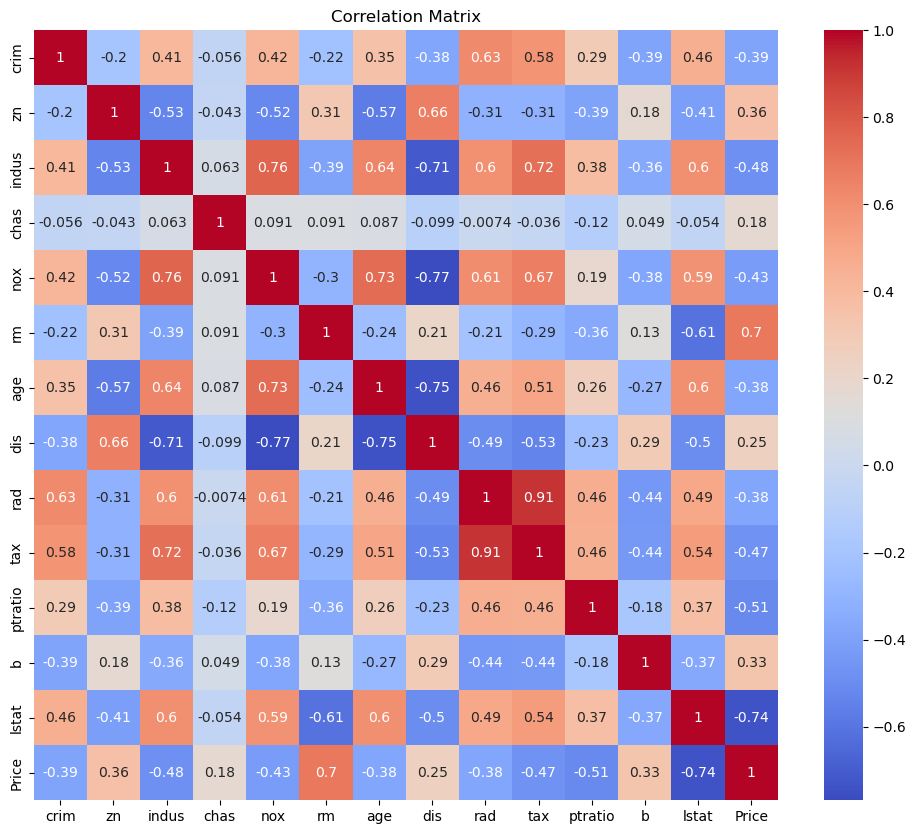

In [174]:
plt.figure(figsize=(12, 10))
sns.heatmap(boston_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [175]:
# Observations:
# Correlations involving dependent variable:

# 1. The highest possitive correlating feature for MEDV_log is RM(average number of rooms).
#     This makes sense as more rooms typically indicates a larger home
# 2. The highest negative correlating feature for MEDV_log is LSTAT(% lower status of the population).
#     This makes sense as cities often have lower income areas.
# 3. It is note worthy that 8/12 of our features have negative correlations with MEDV_log, 
    # this means most of them are measuring undesirable factors.

In [176]:
# Other strong correlations (>= 0.7 or <= -0.7) not involving our dependent variable:

# 1. Positive Correlation between NOX and INDUS, makes sense as more industrial areas would produces more Nitric Oxide
# 2. Positive Correlation between NOX and AGE, perhaps indicating that the older areas are more industrialized?
# 3. Negative Correlation between DIS and INDUS, DIS and NOX, DIS and AGE.
#     Areas farther from Boston's employment centers (higher DIS) tend to be modern, less industrial, and have better air quality.
#     Older, industrialized, and more polluted areas are concentrated closer to Boston's employment centers (lower DIS).
# 4. Positive Correlation between TAX and INDUS
# 5. Very high Positive Correlation between TAX and RAD

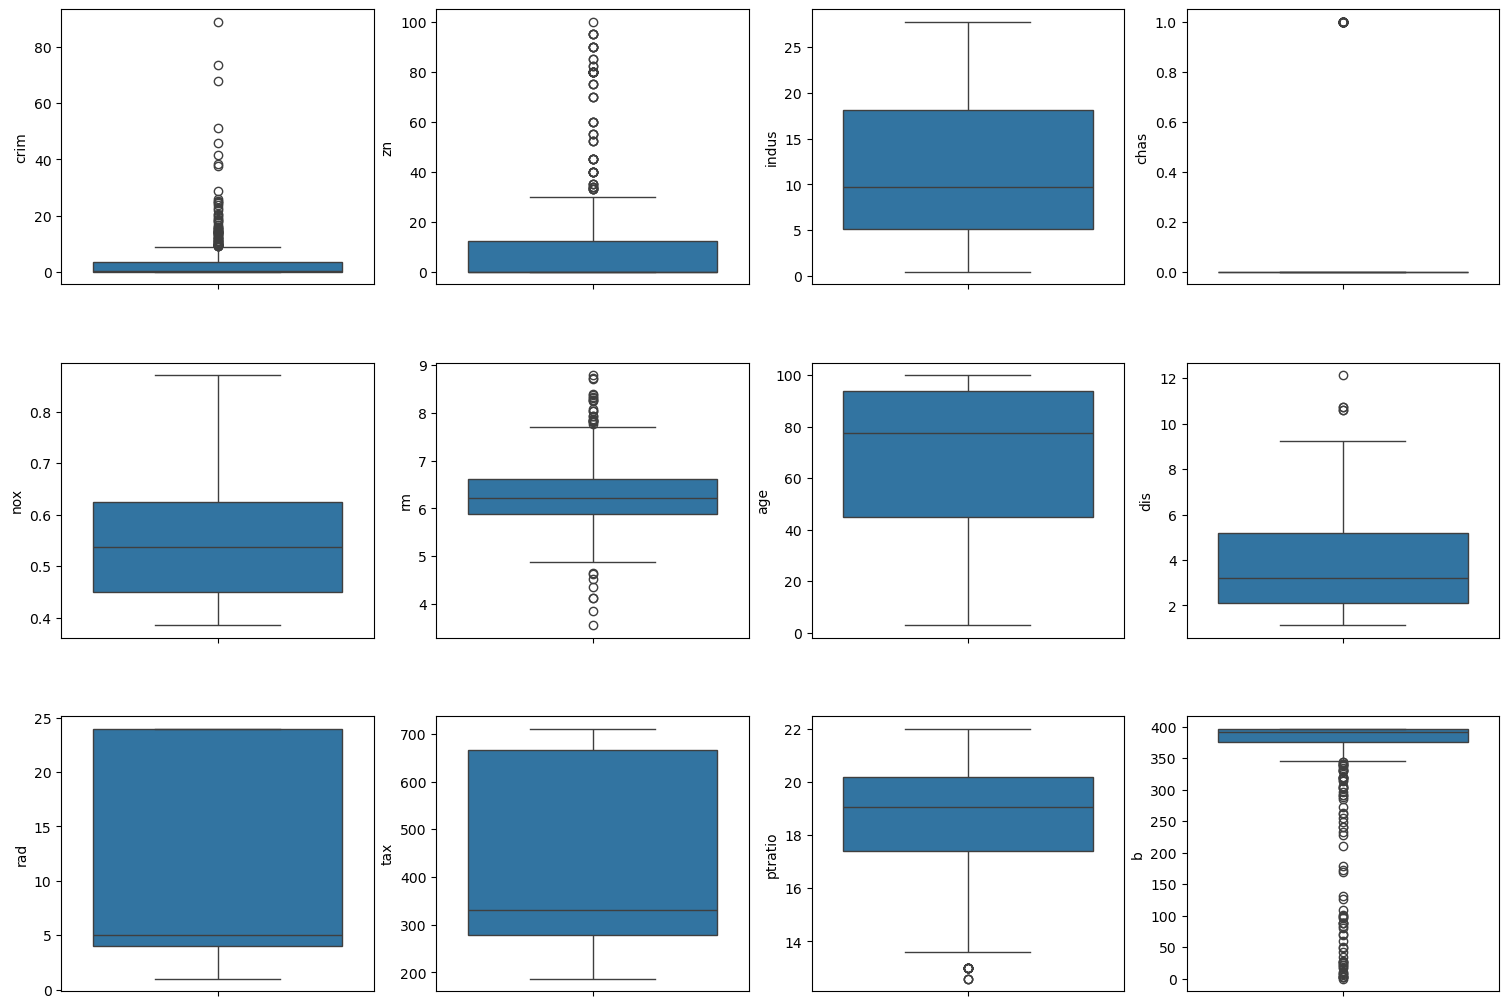

In [177]:
columns_to_plot = boston_df.columns[:12]  # Plot only the first 12 features
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))
axs = axs.flatten()

for index, k in enumerate(columns_to_plot):
    sns.boxplot(y=k, data=boston_df, ax=axs[index])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [178]:
# Visualizing the relationship between tax and rad having high positive correlation value

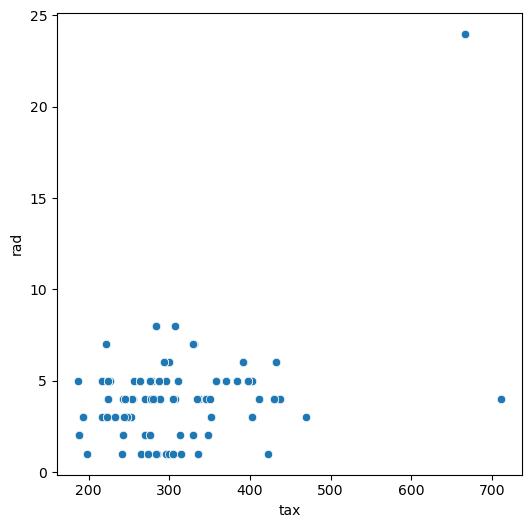

In [179]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'tax', y = 'rad', data = boston_df)
plt.show()

In [180]:
# Removing outliers
# Becuase of this there might be string correlation.
boston_df = boston_df[boston_df["tax"] < 600]

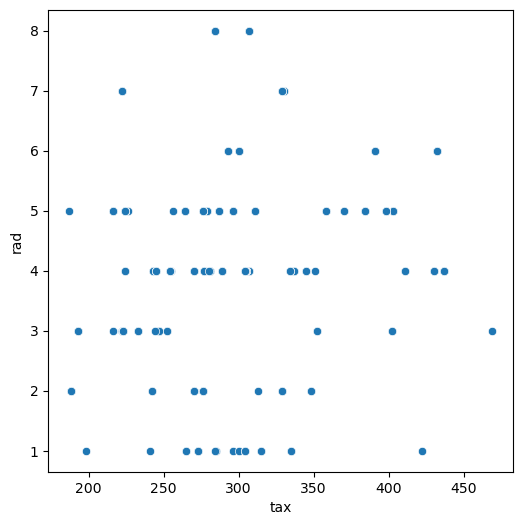

In [181]:
# Scatterplot to visualize the relationship between TAX and RAD
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'tax', y = 'rad', data = boston_df)
plt.show()

In [182]:
from scipy.stats import pearsonr

print('The correlation between TAX and RAD is', pearsonr(boston_df['tax'], boston_df['rad'])[0])

The correlation between TAX and RAD is 0.24975731331429196


In [183]:
# Observation:

# So, the high correlation between TAX and RAD is due to the outliers. 
# The tax rate for some properties might be higher due to some other reason.

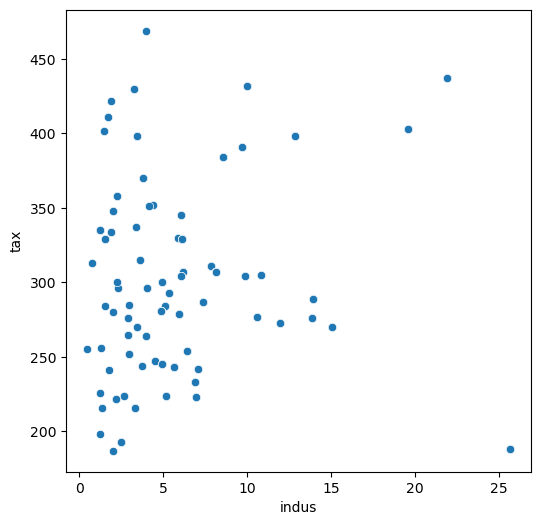

In [184]:
# Scatterplot to visualize the relationship between TAX and INDUS
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'indus', y = 'tax', data = boston_df)
plt.show()

In [185]:
# Observations:

# The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. 
# This might be due to the reason that the variables TAX and INDUS are related with a third variable.

In [186]:
# Visualizing the relationship between the features 
# having significant correlations (>= 0.7 or <= -0.7)

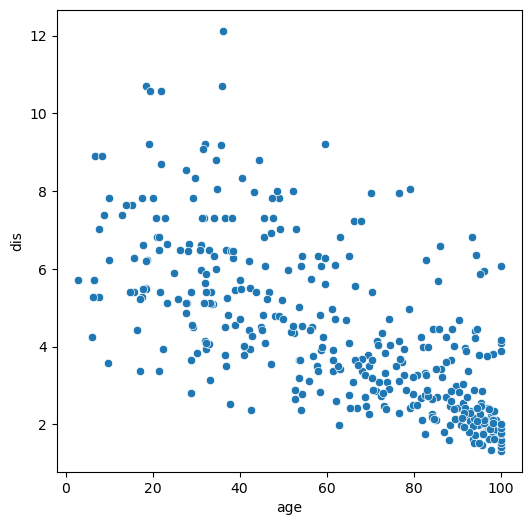

In [187]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'age', y = 'dis', data = boston_df)
plt.show()

In [188]:
# Observations:

# The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses 
# increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of 
# owner-occupied units built prior to 1940 is comparatively high.

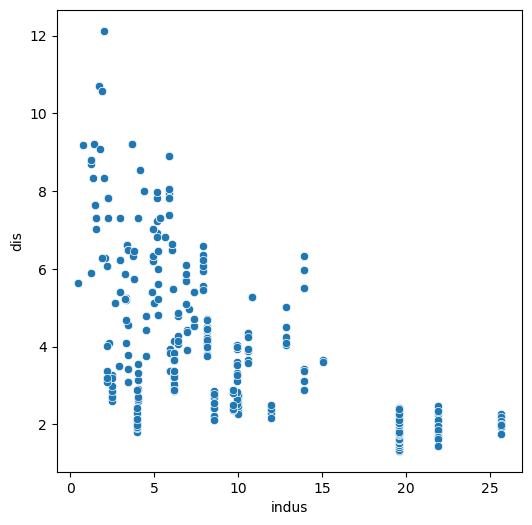

In [189]:
# Scatterplot to visualize the relationship between INDUS and DIS
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'indus', y = 'dis', data = boston_df)
plt.show()

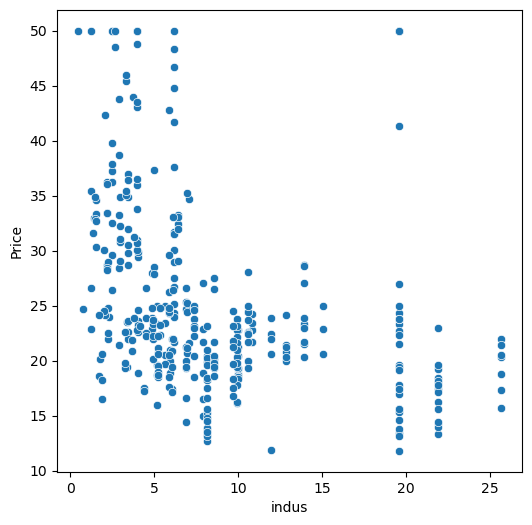

In [190]:
# Scatterplot to visualize the relationship between INDUS and Price
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'indus', y = 'Price', data = boston_df)
plt.show()

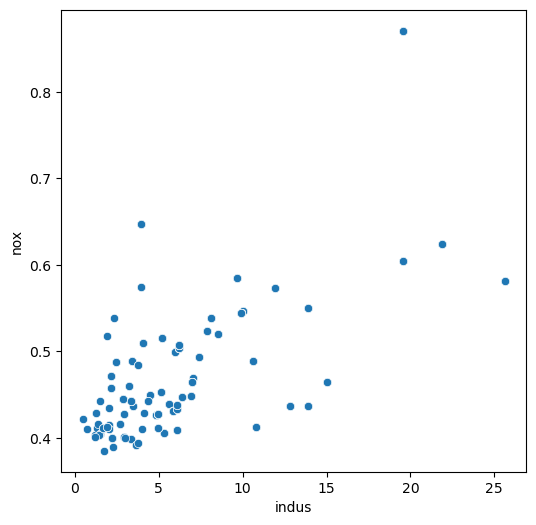

In [191]:
 # Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'indus', y = 'nox', data = boston_df)

plt.show()


In [192]:
# Observations:

# Nitric Oxide does seem to increase with industrial areas
# No obviouse outliers present

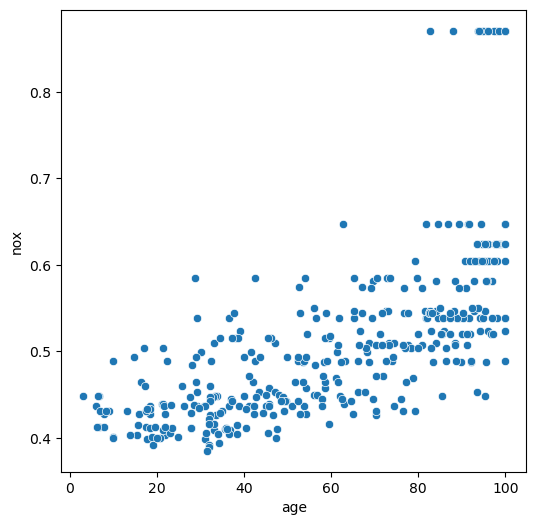

In [193]:
 # Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'age', y = 'nox', data = boston_df)

plt.show()

In [194]:
# Observations:

# Slight increase in Nitric Oxide with age of the house, againg giving credence to the theory that those are more industrial areas
# Posiblibly a group of highest NOX values being outliers.

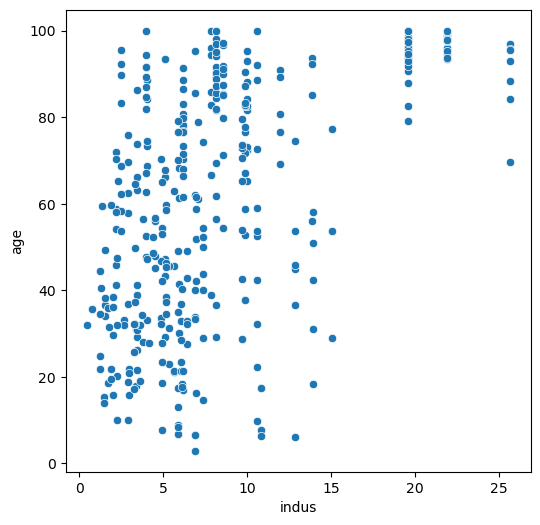

In [195]:
 # Scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'indus', y = 'age', data = boston_df)

plt.show()

In [196]:
# Observations:

# As the age increases the industrial areas proportion increases indicating more nox which can be onferred 
# from the above scatter plots

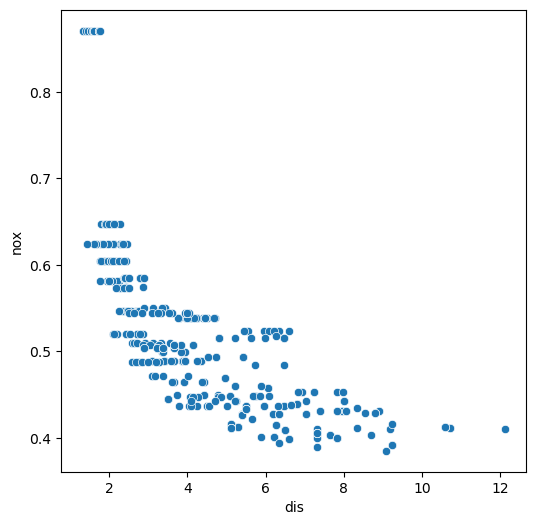

In [197]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'dis', y = 'nox', data = boston_df)

plt.show()


In [198]:
# Observations:

# Nitric Oxide strongly decreases with distance to employment centers. Possible that those centers are located in newer less industruse parts of Boston.

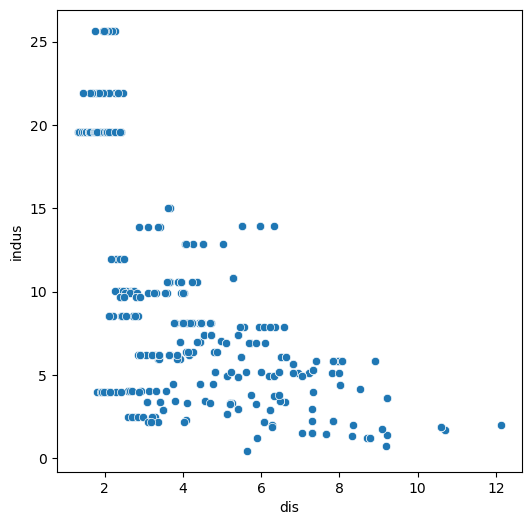

In [199]:
# Scatterplot to visualize the relationship between DIS and INDUS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'dis', y = 'indus', data = boston_df)

plt.show()


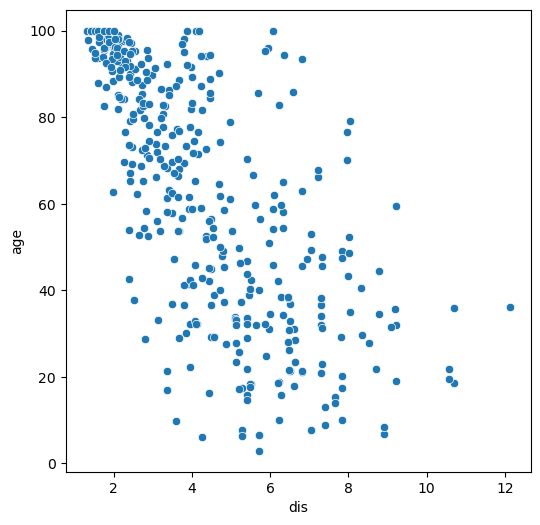

In [200]:
# scatter plot to vosualize the relationship between DIS and AGE

plt.figure(figsize=(6,6))
sns.scatterplot(x="dis", y="age", data=boston_df)
plt.show()

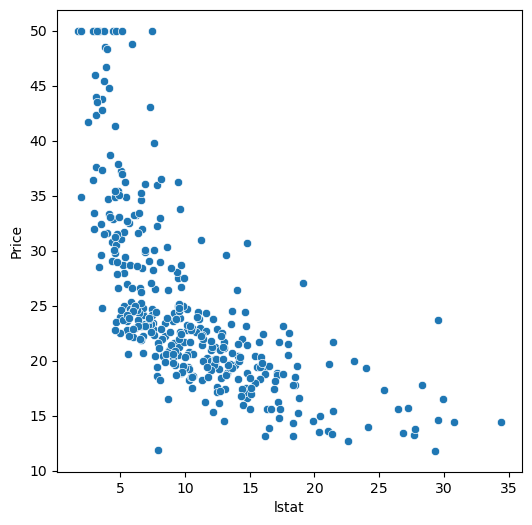

In [201]:
# scatter plot to vosualize the relationship between LSTAT and PRICE

plt.figure(figsize=(6,6))
sns.scatterplot(x="lstat", y="Price", data=boston_df)
plt.show()

In [202]:
# Observations:

# The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
# There are few outliers and the data seems to be capped at 50.

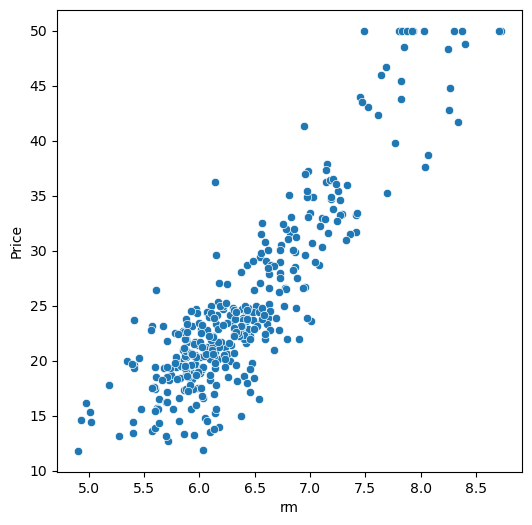

In [203]:
# scatter plot to vosualize the relationship between RM and PRICE

plt.figure(figsize=(6,6))
sns.scatterplot(x="rm", y="Price", data=boston_df)
plt.show()

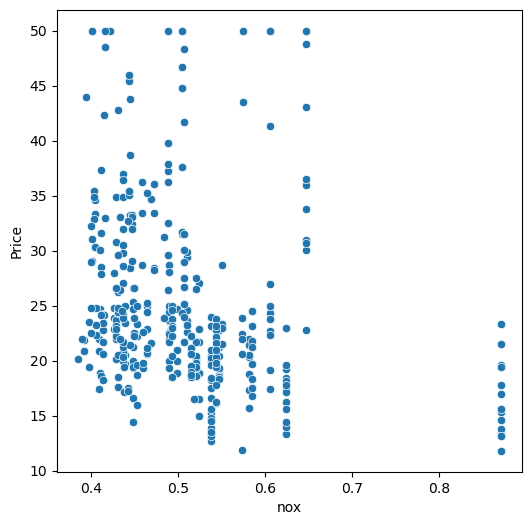

In [204]:
# scatter plot to vosualize the relationship between NOX and PRICE

plt.figure(figsize=(6,6))
sns.scatterplot(x="nox", y="Price", data=boston_df)
plt.show()

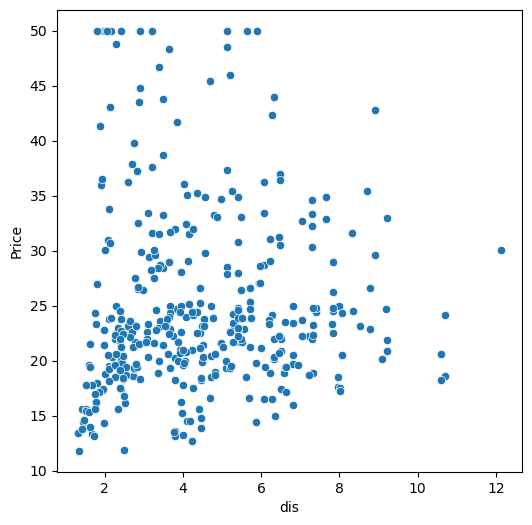

In [205]:
# scatter plot to vosualize the relationship between DIS and PRICE

plt.figure(figsize=(6,6))
sns.scatterplot(x="dis", y="Price", data=boston_df)
plt.show()

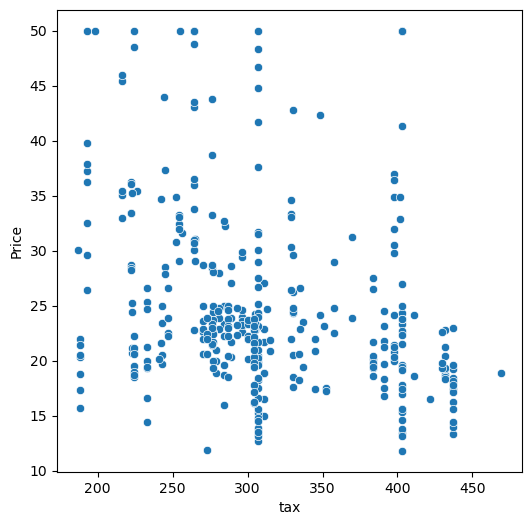

In [206]:
# scatter plot to vosualize the relationship between TAX and PRICE

plt.figure(figsize=(6,6))
sns.scatterplot(x="tax", y="Price", data=boston_df)
plt.show()

In [207]:
# Split the dataset
# Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [208]:
# Separate the dependent variable and indepedent variables
Y = boston_df['Price']
X = boston_df.drop(columns = "Price")

In [209]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [210]:
# Check for Multicollinearity
# Using the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

# Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0      crim    4.359121
1        zn    3.558985
2     indus    9.066112
3      chas    1.198462
4       nox   98.874482
5        rm  126.774887
6       age   14.934105
7       dis   16.177214
8       rad   10.271650
9       tax   38.847790
10  ptratio   80.209298
11        b  122.381383
12    lstat   10.974913


In [212]:
# Key Observations

# 1. Threshold for VIF:
#     A VIF > 10 typically indicates high multicollinearity, though thresholds can vary (e.g., VIF > 5 may also be considered high in some cases).
    
# 2. Features with High VIF:
#     nox (98.87), rm (126.77), b (122.38), ptratio (80.21), and tax (38.85) have very high VIF values, suggesting significant multicollinearity.
    
# 3. Features with Moderate VIF:
#     dis (16.18), age (14.93), rad (10.27), and lstat (10.97) also show moderate multicollinearity.
    
# 4. Features with Low VIF:
#     chas (1.20), zn (3.56), and crim (4.36) appear to have minimal multicollinearity.


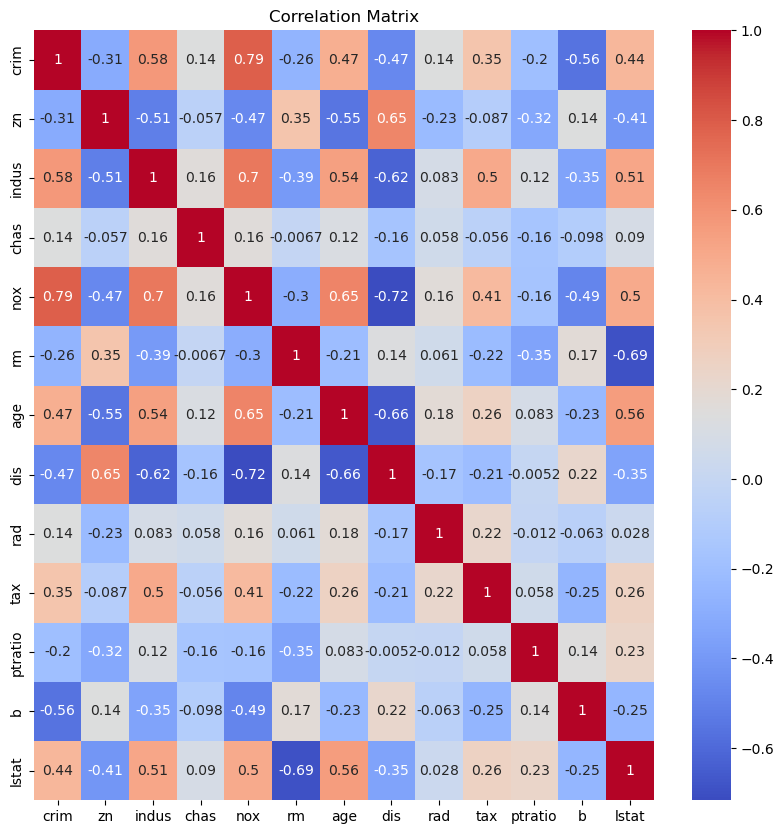

In [213]:
plt.figure(figsize=(10,10))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [214]:
X_train = X_train.drop(columns = 'b')

# Check for VIF
print(checking_vif(X_train))

    feature        VIF
0      crim   3.800469
1        zn   3.558394
2     indus   9.044784
3      chas   1.198106
4       nox  94.799680
5        rm  95.762953
6       age  14.890917
7       dis  15.945018
8       rad  10.269302
9       tax  38.847522
10  ptratio  70.132269
11    lstat  10.587802


In [215]:
X_train = X_train.drop(columns = 'tax')

# Check for VIF
print(checking_vif(X_train))

    feature        VIF
0      crim   3.797704
1        zn   3.295161
2     indus   7.632644
3      chas   1.164920
4       nox  89.651693
5        rm  95.698810
6       age  14.857918
7       dis  15.645396
8       rad   9.469496
9   ptratio  67.679135
10    lstat  10.575800


In [216]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
X_test = X_test.drop(columns = {'tax',"b"})
y_pred_lr = lr_model.predict(X_test)

In [217]:
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)


print("Mean absolute Error: {}".format(lr_mae))
print("Mean squared Error: {}".format(lr_mse))
print("r2 score: {}".format(lr_r2))
print("root mean squred error: {}".format(lr_rmse))

Mean absolute Error: 2.3283272507271904
Mean squared Error: 8.874138684979764
r2 score: 0.861983163625339
root mean squred error: 2.978949258543986


In [218]:
#We can see the mse is more, it might be due to presence of high VIF - which indicating multicollinearity
# So we need to improve the model, this can be mitigated by Ridge Regression, Increase sample size and other steps.
# Lets us see ridge regressor

In [219]:
ridge_model = Ridge(alpha=100)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Mean squared Error: {}".format(mse_ridge))
print("r2 score: {}".format(r2_ridge))

Mean squared Error: 18.44998561500662
r2 score: 0.7130528678742386


In [220]:
# From the above results we find that ridge regressor is not performing well. So, let us think the other reasons. For that we need plot a residual plot 
# which shows the difference between residuals and predicted values

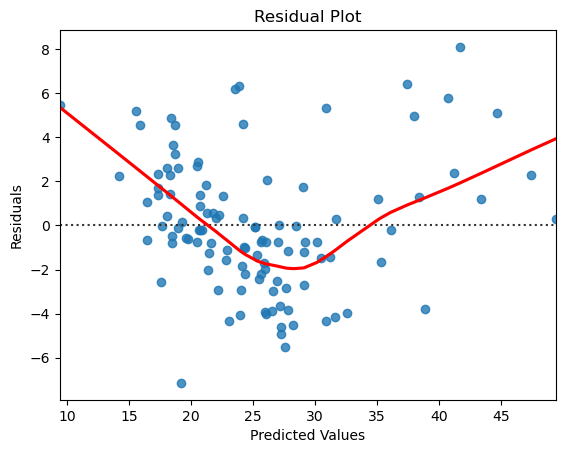

In [221]:
sns.residplot(x=lr_model.predict(X_test), y=y_test, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [222]:
# Interpretation of the Residual Plot:
# Residuals vs. Predicted Values:

# The residuals are plotted against the predicted values of the model.
# Ideally, residuals should be randomly scattered around the horizontal line at zero (indicating no systematic pattern in the errors).
# Curved Pattern:

# Your plot shows a distinct curve (U-shaped pattern). This suggests that the relationship between the predictors and the target variable is non-linear.
# Linear regression assumes a linear relationship between the predictors and the target. The curved pattern implies the model is not capturing this relationship adequately.
# Heteroscedasticity:

# In some areas of the plot, the spread of residuals seems to vary (e.g., residuals are more spread out for lower predicted values).
# This indicates heteroscedasticity, where the variance of errors is not constant across all levels of predicted values. It violates another assumption of linear regression.

# The above observation means:

# The model (linear regression) is not fully capturing the complexity of the relationship between features and the target variable.
# There may be missing non-linear interactions or transformations of features.

# Next Steps to Improve the Model:

# 1. Try Non-Linear Models:
#     Switch to models like Random Forests, Gradient Boosting (e.g., XGBoost, LightGBM), or Support Vector Machines (SVM), which can handle non-linear relationships better.

# 2. Feature Engineering:
#     Add polynomial features or interaction terms to capture non-linearity.
#     Transform variables (e.g., logarithmic or square-root transformations for features like CRIM or DIS).
                         
# 3. Address Heteroscedasticity:
#     Apply techniques like weighted least squares regression or log-transforming the target variable to stabilize variance.

# 4. Test for Linearity:
#     Use visualizations or statistical tests to check if individual predictors have a linear relationship with the target.
#     For instance, plot each predictor against the target to identify non-linear patterns.
                
# 5. Residual Diagnostics:
#     Check if certain predictors are strongly influencing the residual pattern. You can include interaction terms or transformations for such predictors.

In [223]:
# Lets us some solutions to tune the model and improve the mae, mse and r2 metrics
# Making sure we have linear plot between residuals and predicted values

In [224]:
# Step 1: Try Non-Linear Models
# Non-linear models can handle complex relationships between features and the target variable.

from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest MSE: {}".format(rf_mse))
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R2: {rf_r2}")


Random Forest MSE: 7.256437783783784
Random Forest RMSE: 2.693777604737218
Random Forest MAE: 2.0104504504504503
Random Forest R2: 0.8871427840132208


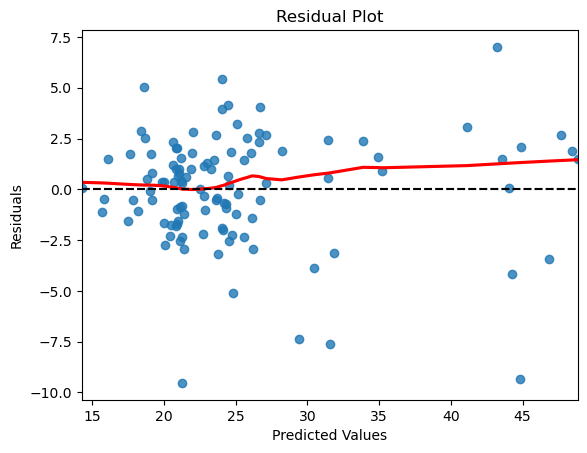

In [225]:
import seaborn as sns

# Calculate residuals
residuals = y_test - rf_predictions

# Plot residuals
sns.residplot(x=rf_predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='black')
plt.show()


In [226]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
print("Best parameters:", rf_grid.best_params_)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [227]:
#with best parameters
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=300, max_depth= 20, min_samples_leaf=4, min_samples_split=2)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R2: {rf_r2}")

Random Forest MSE: 7.448609527011339
Random Forest RMSE: 2.7292140859616234
Random Forest MAE: 2.0155736502460564
Random Forest R2: 0.8841539941168263


In [228]:
# Step 2: Add Polynomial Features
# Polynomial features can capture non-linear relationships while still using a linear regression model.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Make predictions
poly_predictions = poly_model.predict(X_test)

# Evaluate the model
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_predictions))
poly_mae = mean_absolute_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)

print(f"Polynomial RMSE: {poly_rmse}")
print(f"Polynomial MAE: {poly_mae}")
print(f"Polynomial R2: {poly_r2}")


Polynomial RMSE: 2.327422361297584
Polynomial MAE: 1.8078076530640066
Polynomial R2: 0.915752647505683


In [229]:
# Step 3: Address Heteroscedasticity
# If the residuals have varying variance (heteroscedasticity), applying a log transformation to the target variable may help.

# Log-transform the target
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Train the model with the transformed target
lr_model.fit(X_train, y_train_log)

# Make predictions and revert the transformation
log_predictions = np.exp(lr_model.predict(X_test))

# Evaluate the model
log_rmse = np.sqrt(mean_squared_error(y_test, log_predictions))
log_mae = mean_absolute_error(y_test, log_predictions)
log_r2 = r2_score(y_test, log_predictions)

print(f"Log-Transformed RMSE: {log_rmse}")
print(f"Log-Transformed MAE: {log_mae}")
print(f"Log-Transformed R2: {log_r2}")


Log-Transformed RMSE: 2.7102906626428576
Log-Transformed MAE: 2.014348974785256
Log-Transformed R2: 0.885754896759762
